In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
data = np.genfromtxt('ajax-2D-time-series-ALL-tracks-362.txt', delimiter=',')

In [11]:
T=1441

In [12]:
tracks=[]
m=[[],[],[]]
m[0].append(data[0,0])
m[1].append(data[0,1])
m[2].append(data[0,2])
for i in range(1,len(data[:,1])):
    if data[i,0] - data[i-1,0] == 1:
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    else:
        tracks.append(m)
        m=[[],[],[]]
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    if i == (len(data[:,1]) - 1):
        tracks.append(m)

In [14]:
normalisation1=np.zeros(T)
for i in range(len(tracks)):
    normalisation1[int(tracks[i][0][0]):int(tracks[i][0][-1]) + 1] += 1

In [13]:
tracks1=np.asarray(tracks,dtype=object)

In [15]:
data = np.genfromtxt('armin-2D-time-series-ALL-tracks-1048.txt', delimiter=',')

In [16]:
T=3479 

In [17]:
tracks=[]
m=[[],[],[]]
m[0].append(data[0,0])
m[1].append(data[0,1])
m[2].append(data[0,2])
for i in range(1,len(data[:,1])):
    if data[i,0] - data[i-1,0] == 1:
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    else:
        tracks.append(m)
        m=[[],[],[]]
        m[0].append(data[i,0])
        m[1].append(data[i,1])
        m[2].append(data[i,2])
    if i == (len(data[:,1]) - 1):
        tracks.append(m)

In [18]:
normalisation2=np.zeros(T)
for i in range(len(tracks)):
    normalisation2[int(tracks[i][0][0]):int(tracks[i][0][-1]) + 1] += 1

In [19]:
tracks2=np.asarray(tracks,dtype=object)

# Contacts

In [32]:
def SMAfilter(m1, win):
    ma1 = [np.nan for i in range(len(m1))]
    for i in range(len(m1)):
        SigmaX = 0
        N = 0
        Xt=None
        for j in range(-win, win + 1):
            if i - j < 0:
                if not np.isnan(m1[0]):
                    N+=1
                    Xt = m1[0]
            elif i - j > len(m1) - 1:
                if not np.isnan(m1[-1]):
                    N+=1
                    Xt = m1[-1]
            else:
                if not np.isnan(m1[i - j]):
                    N+=1
                    Xt = m1[i - j]
            if Xt is not None:
                SigmaX += Xt
        if SigmaX > 0:
            ma1[i] = SigmaX / N
    return ma1

In [22]:
df1=pd.read_csv('contactsequence362a.csv',header=None,names=['Source','Target','timestamp'])
df2=pd.read_csv('contactsequence1048.csv',header=None,names=['Source','Target','timestamp'])

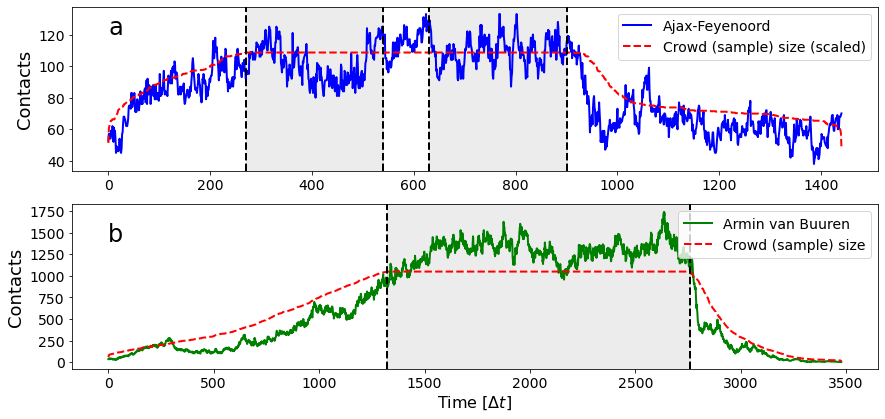

In [23]:
fig = plt.figure(figsize=(14,6))
grid = plt.GridSpec(2, 1, left=0.1,right=None,bottom=0.12,top=0.96,hspace=0.2, wspace=0.2)

p1=fig.add_subplot(grid[0, 0])
p2=fig.add_subplot(grid[1, 0])

p1.plot(df1.groupby('timestamp').size().values,color='b',linewidth=2,label='Ajax-Feyenoord')
p1.plot(normalisation1*0.3,color='r',linestyle='--',linewidth=2,label='Crowd (sample) size (scaled)')
p1.axvspan(270,540, alpha=0.15, color='grey')
p1.axvspan(630,900, alpha=0.15, color='grey')
p1.axvline(270, color='k', linestyle='--',linewidth=2)
p1.axvline(540, color='k', linestyle='--',linewidth=2)
p1.axvline(630, color='k', linestyle='--',linewidth=2)
p1.axvline(900, color='k', linestyle='--',linewidth=2)

#p1.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
p1.text(0, 120, 'a', fontsize=24)
p1.set_ylabel('Contacts', fontsize=18)
plt.setp(p1.get_xticklabels(), fontsize=14)
plt.setp(p1.get_yticklabels(), fontsize=14)
p1.legend(fontsize=14,loc=1)

p2.plot(df2.groupby('timestamp').size().values,color='g',linewidth=2,label='Armin van Buuren')
p2.plot(normalisation2,color='r',linestyle='--',linewidth=2,label='Crowd (sample) size')
p2.axvspan(1320,2760, alpha=0.15, color='grey')
p2.axvline(1320, color='k',linestyle='dashed',linewidth=2)
p2.axvline(2760, color='k',linestyle='dashed',linewidth=2)

p2.text(0, 1400, 'b', fontsize=24)
#p2.set_xlim([0,])
p2.legend(fontsize=14,loc=1)

plt.xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
plt.ylabel('Contacts', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.subplots_adjust(top=0.95, bottom=0.05)
#plt.savefig('/Users/philip/Documents/PhD/publication3/figures/temp3/contact-curves-combiplot-20210528.png')
plt.show()

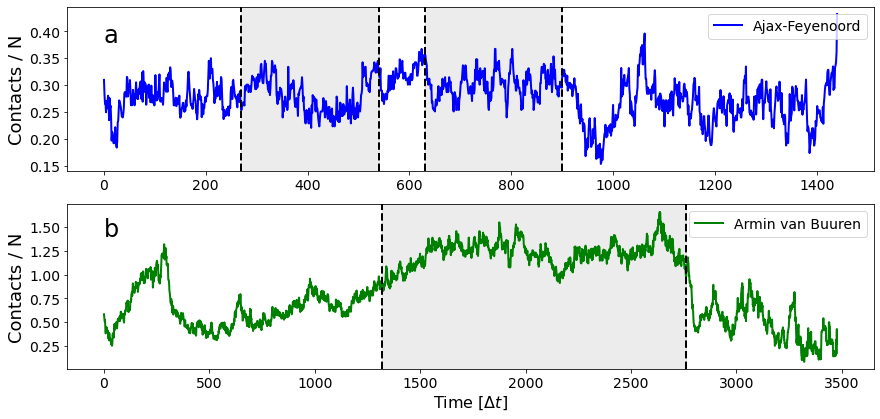

In [24]:
fig = plt.figure(figsize=(14,6))
grid = plt.GridSpec(2, 1, left=0.1,right=None,bottom=0.12,top=0.96,hspace=0.2, wspace=0.2)

p1=fig.add_subplot(grid[0, 0])
p2=fig.add_subplot(grid[1, 0])

p1.plot(df1.groupby('timestamp').size().values /\
        normalisation1,color='b',linewidth=2,label='Ajax-Feyenoord')
p1.axvspan(270,540, alpha=0.15, color='grey')
p1.axvspan(630,900, alpha=0.15, color='grey')
p1.axvline(270, color='k', linestyle='--',linewidth=2)
p1.axvline(540, color='k', linestyle='--',linewidth=2)
p1.axvline(630, color='k', linestyle='--',linewidth=2)
p1.axvline(900, color='k', linestyle='--',linewidth=2)

#p1.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
p1.text(0, 0.38, 'a', fontsize=24)
p1.set_ylabel('Contacts / N', fontsize=18)
plt.setp(p1.get_xticklabels(), fontsize=14)
plt.setp(p1.get_yticklabels(), fontsize=14)
p1.legend(fontsize=14,loc=1)

p2.plot(df2.groupby('timestamp').size().values /\
        normalisation2[:-1],color='g',linewidth=2,label='Armin van Buuren')
p2.axvspan(1320,2760, alpha=0.15, color='grey')
p2.axvline(1320, color='k',linestyle='dashed',linewidth=2)
p2.axvline(2760, color='k',linestyle='dashed',linewidth=2)

p2.text(0, 1.4, 'b', fontsize=24)
#p2.set_xlim([0,])
p2.legend(fontsize=14,loc=1)

plt.xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
plt.ylabel('Contacts / N', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.subplots_adjust(top=0.95, bottom=0.05)
#plt.savefig('/Users/philip/Documents/PhD/publication3/figures/temp3/contact-curves-normed-combiplot-20210528.png')
plt.show()

# Incidence curves

In [25]:
def getcumIncidence(df,T):
    # Network size
    n = len(np.union1d(df['Source'].unique(),df['Target'].unique()))
    nodes = np.union1d(df['Source'].unique(),df['Target'].unique())

    incidencecurves = np.zeros((n,T))
    count=0
    for i in range(n): 
        node = nodes[i]
        if count%100==0:
            print(count)
        for j in df[df['Source'] == node]['Target'].unique():
            incidencecurves[i][df[(df['Source'] == node) & \
                               (df['Target'] == j)]['timestamp'].values[0]:] += 1
        for j in df[df['Target'] == node]['Source'].unique():
            incidencecurves[i][df[(df['Target'] == node) & \
                               (df['Source'] == j)]['timestamp'].values[0]:] += 1
        count+=1
    return incidencecurves

In [26]:
incidencecurves1 = getcumIncidence(df1,T=1441)
meanincidence1 = np.mean(incidencecurves1, axis=0)
meanincidence1.shape

0
100
200
300


(1441,)

In [27]:
incidencecurves2 = getcumIncidence(df2,T=3479)
meanincidence2 = np.mean(incidencecurves2, axis=0)
meanincidence2.shape

0
100
200
300
400
500
600
700
800
900
1000


(3479,)

In [28]:
## These are the average degrees
np.max(meanincidence1),np.max(meanincidence2)

(17.2797783933518, 161.6736641221374)

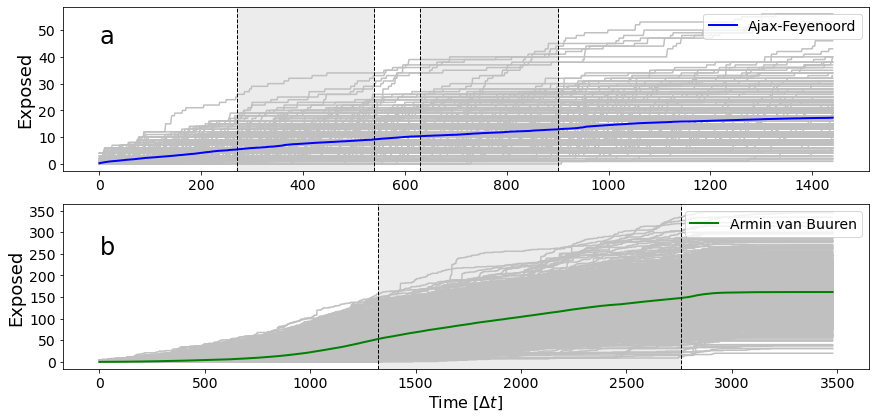

In [29]:
fig = plt.figure(figsize=(14,6))
grid = plt.GridSpec(2, 1, left=0.1,right=None,bottom=0.12,top=0.96,hspace=0.2, wspace=0.2)

p1=fig.add_subplot(grid[0, 0])
p2=fig.add_subplot(grid[1, 0])

p1.axvspan(270,540, alpha=0.15, color='grey')
p1.axvspan(630,900, alpha=0.15, color='grey')
for i in range(incidencecurves1.shape[0]):
    p1.plot(incidencecurves1[i], color='silver')
p1.plot(meanincidence1, color='b', linewidth=2,label='Ajax-Feyenoord')
p1.axvline(270, color='k', linestyle='--',linewidth=1)
p1.axvline(540, color='k', linestyle='--',linewidth=1)
p1.axvline(630, color='k', linestyle='--',linewidth=1)
p1.axvline(900, color='k', linestyle='--',linewidth=1)

#p1.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
p1.text(0, 45, 'a', fontsize=24)
p1.set_ylabel('Exposed', fontsize=18)
plt.setp(p1.get_xticklabels(), fontsize=14)
plt.setp(p1.get_yticklabels(), fontsize=14)
p1.legend(fontsize=14,loc=1)

p2.axvspan(1320,2760, alpha=0.15, color='grey')
for i in range(incidencecurves2.shape[0]):
    p2.plot(incidencecurves2[i], color='silver')
p2.plot(meanincidence2, color='g', linewidth=2,label='Armin van Buuren')
p2.axvline(1320, color='k',linestyle='dashed',linewidth=1)
p2.axvline(2760, color='k',linestyle='dashed',linewidth=1)

p2.text(0, 250, 'b', fontsize=24)
#p2.set_xlim([0,])
p2.legend(fontsize=14,loc=1)

plt.xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
plt.ylabel('Exposed', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.subplots_adjust(top=0.95, bottom=0.05)
'''plt.savefig('/Users/philip/Documents/PhD/publication3/figures/temp3/\
cumulative-incidence-combiplot-20210528.png')'''
plt.show()

## Infectious contacts

In [30]:
def getfirstIncidence(df,T):
    # Network size
    n = len(np.union1d(df['Source'].unique(),df['Target'].unique()))
    nodes = np.union1d(df['Source'].unique(),df['Target'].unique())

    infectiontimes = np.zeros((n,T))
    count=0
    for i in range(n): 
        node = nodes[i]
        if count%100==0:
            print(count)
        for j in df[df['Source'] == node]['Target'].unique():
            infectiontimes[i][df[(df['Source'] == node) & \
                               (df['Target'] == j)]['timestamp'].values[0]] += 1
        for j in df[df['Target'] == node]['Source'].unique():
            infectiontimes[i][df[(df['Target'] == node) & \
                               (df['Source'] == j)]['timestamp'].values[0]] += 1
        count+=1
    return infectiontimes

In [33]:
infectiontimes1 = getfirstIncidence(df1,T=1441)
meaninfections1 = np.mean(infectiontimes1, axis=0)
foo1 = SMAfilter(meaninfections1, win=15)

0
100
200
300


In [34]:
infectiontimes2 = getfirstIncidence(df2,T=3479)
meaninfections2 = np.mean(infectiontimes2, axis=0)
foo2 = SMAfilter(meaninfections2, win=15)

0
100
200
300
400
500
600
700
800
900
1000


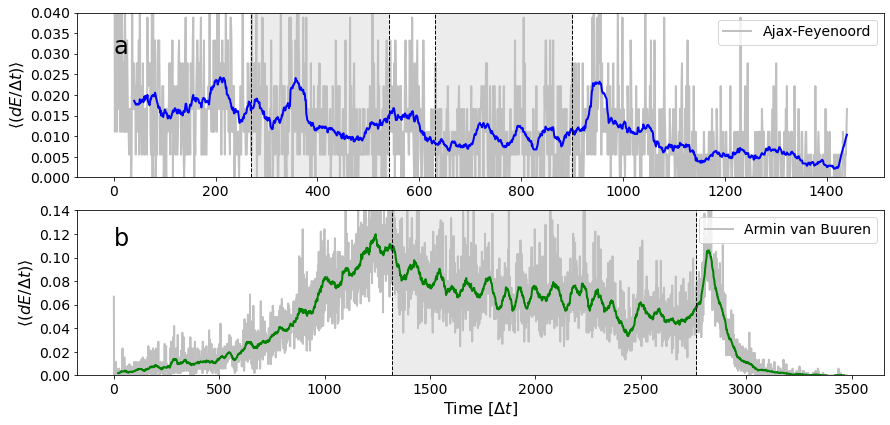

In [35]:
fig = plt.figure(figsize=(14,6))
grid = plt.GridSpec(2, 1, left=0.1,right=None,bottom=0.12,top=0.96,hspace=0.2, wspace=0.2)

p1=fig.add_subplot(grid[0, 0])
p2=fig.add_subplot(grid[1, 0])

p1.axvspan(270,540, alpha=0.15, color='grey')
p1.axvspan(630,900, alpha=0.15, color='grey')
p1.plot(meaninfections1, color='silver', linewidth=2,label='Ajax-Feyenoord')
p1.plot(np.arange(40,len(meaninfections1),1),foo1[40:], color='b', linewidth=2)
p1.axvline(270, color='k', linestyle='--',linewidth=1)
p1.axvline(540, color='k', linestyle='--',linewidth=1)
p1.axvline(630, color='k', linestyle='--',linewidth=1)
p1.axvline(900, color='k', linestyle='--',linewidth=1)

p1.set_ylim([0,0.04])

#p1.set_xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
p1.text(0, 0.03, 'a', fontsize=24)
p1.set_ylabel(r'$\langle(dE/\Delta t)\rangle$', fontsize=16)
plt.setp(p1.get_xticklabels(), fontsize=14)
plt.setp(p1.get_yticklabels(), fontsize=14)
p1.legend(fontsize=14,loc=1)

p2.axvspan(1320,2760, alpha=0.15, color='grey')
p2.plot(meaninfections2, color='silver', linewidth=2,label='Armin van Buuren')
p2.plot(np.arange(20,len(meaninfections2),1),foo2[20:], color='g', linewidth=2)
p2.axvline(1320, color='k',linestyle='dashed',linewidth=1)
p2.axvline(2760, color='k',linestyle='dashed',linewidth=1)

p2.set_ylim([0,0.14])

p2.text(0, 0.11, 'b', fontsize=24)
#p2.set_xlim([0,])
p2.legend(fontsize=14,loc=1)

plt.xlabel('Time [' + r'$\Delta t$' + ']', fontsize=16)
plt.ylabel(r'$\langle(dE/\Delta t)\rangle$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.subplots_adjust(top=0.95, bottom=0.05)
'''plt.savefig('/Users/philip/Documents/PhD/publication3/figures/temp3/\
first-incidence-combiplot-20210528.png')'''
plt.show()